<a href="https://colab.research.google.com/github/joshuabae/Team-JPJ/blob/main/Patrick's_Workspace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("hello world")

hello world


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving data_dictionary.xlsx to data_dictionary.xlsx
Saving scoring_format.csv to scoring_format.csv
Saving submission_format.csv to submission_format.csv
Saving training.csv to training.csv


In [ ]:
df = pd.read_csv('training.csv')

In [ ]:
df.head()

,StoreNumber,dayOfTheYear,3HourBucket,GrossSoldQuantity,Cash/Credit Site,EBT Site,Loyalty Site,ExtraMile Site,CoBrand,Alcohol,Carwash,Food Service,City,State
0,1000,1,1,3,False,True,True,True,No,True,False,True,HOUSTON,TX
1,1000,1,2,5,False,True,True,True,No,True,False,True,HOUSTON,TX
2,1000,1,3,6,False,True,True,True,No,True,False,True,HOUSTON,TX
3,1000,1,4,3,False,True,True,True,No,True,False,True,HOUSTON,TX
4,1000,2,1,13,False,True,True,True,No,True,False,True,HOUSTON,TX


In [ ]:
df.nunique()

StoreNumber            4
dayOfTheYear         363
3HourBucket            4
GrossSoldQuantity    119
Cash/Credit Site       1
EBT Site               2
Loyalty Site           1
ExtraMile Site         1
CoBrand                1
Alcohol                2
Carwash                2
Food Service           1
City                   4
State                  1
dtype: int64

In [ ]:
df = df.drop(columns=['Cash/Credit Site', 'Loyalty Site', 'ExtraMile Site', 'CoBrand', 'Food Service', 'City', 'State'])

In [ ]:
df.head()

,StoreNumber,dayOfTheYear,3HourBucket,GrossSoldQuantity,EBT Site,Alcohol,Carwash
0,1000,1,1,3,True,True,False
1,1000,1,2,5,True,True,False
2,1000,1,3,6,True,True,False
3,1000,1,4,3,True,True,False
4,1000,2,1,13,True,True,False


In [ ]:
sub_example = pd.read_csv('submission_format.csv')

In [ ]:
sub_example.head()

,StoreNumber,dayOfTheYear,3HourBucket,GrossSoldQuantity
0,1000,364,1,0
1,1000,364,2,0
2,1000,364,3,0
3,1000,364,4,0
4,1000,365,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5660 entries, 0 to 5659
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   StoreNumber        5660 non-null   int64
 1   dayOfTheYear       5660 non-null   int64
 2   3HourBucket        5660 non-null   int64
 3   GrossSoldQuantity  5660 non-null   int64
 4   EBT Site           5660 non-null   bool 
 5   Alcohol            5660 non-null   bool 
 6   Carwash            5660 non-null   bool 
dtypes: bool(3), int64(4)
memory usage: 193.6 KB


In [ ]:
df.describe()

,StoreNumber,dayOfTheYear,3HourBucket,GrossSoldQuantity
count,5660.000000,5660.000000,5660.000000,5660.000000
mean,2500.706714,181.631449,2.504240,22.690989
std,1118.132545,104.530966,1.115276,22.281150
min,1000.000000,1.000000,1.000000,0.000000
25%,2000.000000,91.000000,2.000000,5.000000
50%,2500.000000,181.000000,3.000000,13.000000
75%,4000.000000,272.000000,3.000000,36.000000
max,4000.000000,363.000000,4.000000,184.000000


In [ ]:
df.StoreNumber.value_counts()

4000    1417
2000    1417
3000    1413
1000    1413
Name: StoreNumber, dtype: int64

In [ ]:
df.dayOfTheYear.value_counts()

2      16
121    16
129    16
133    16
137    16
       ..
15     12
363    12
132    10
239     8
309     8
Name: dayOfTheYear, Length: 363, dtype: int64

In [ ]:
df['3HourBucket'].value_counts()

3    1424
2    1424
4    1414
1    1398
Name: 3HourBucket, dtype: int64

In [ ]:
# add day of the week, mostly due to varience between weekdays vs weekends
df['DayOfTheWeek'] = df['dayOfTheYear'].map(lambda x: x % 7)

In [ ]:
df.head()

,StoreNumber,dayOfTheYear,3HourBucket,GrossSoldQuantity,EBT Site,Alcohol,Carwash,DayOfTheWeek
0,1000,1,1,3,True,True,False,1
1,1000,1,2,5,True,True,False,1
2,1000,1,3,6,True,True,False,1
3,1000,1,4,3,True,True,False,1
4,1000,2,1,13,True,True,False,2


In [ ]:
# outlier rows for July 4th
df2 = df.drop(index=[720, 721, 722, 723, 2135, parameter2136, 2137, 2138, 3550, 3551, 3552, 3553, 4965, 4966, 4967, 4968]).reset_index(drop=True)
df2['EBT Site'] = df2['EBT Site'].astype(int)
df2['Alcohol'] = df2['Alcohol'].astype(int)
df2['Carwash'] = df2['Carwash'].astype(int)

In [ ]:
df2.head()

,StoreNumber,dayOfTheYear,3HourBucket,GrossSoldQuantity,EBT Site,Alcohol,Carwash,DayOfTheWeek
0,1000,1,1,3,1,1,0,1
1,1000,1,2,5,1,1,0,1
2,1000,1,3,6,1,1,0,1
3,1000,1,4,3,1,1,0,1
4,1000,2,1,13,1,1,0,2


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   StoreNumber        5644 non-null   int64
 1   dayOfTheYear       5644 non-null   int64
 2   3HourBucket        5644 non-null   int64
 3   GrossSoldQuantity  5644 non-null   int64
 4   EBT Site           5644 non-null   int64
 5   Alcohol            5644 non-null   int64
 6   Carwash            5644 non-null   int64
 7   DayOfTheWeek       5644 non-null   int64
dtypes: int64(8)
memory usage: 352.9 KB


In [ ]:
df2.describe()

,StoreNumber,dayOfTheYear,3HourBucket,GrossSoldQuantity,EBT Site,Alcohol,Carwash,DayOfTheWeek
count,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000
mean,2500.708717,181.621899,2.504252,22.502481,0.499291,0.499291,0.500000,3.007796
std,1118.132824,104.678900,1.115269,21.890384,0.500044,0.500044,0.500044,1.994839
min,1000.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2000.000000,91.000000,2.000000,5.000000,0.000000,0.000000,0.000000,1.000000
50%,2500.000000,181.000000,3.000000,13.000000,0.000000,0.000000,0.500000,3.000000
75%,4000.000000,273.000000,3.000000,36.000000,1.000000,1.000000,1.000000,5.000000
max,4000.000000,363.000000,4.000000,133.000000,1.000000,1.000000,1.000000,6.000000


In [ ]:
import seaborn as sns

In [ ]:
sns.pairplot(df2, hue='StoreNumber')

In [ ]:
X = df2.drop(columns=['GrossSoldQuantity'])
y = df2['GrossSoldQuantity']
print(X)
print(y)

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=69)
Xtrain.reset_index(drop=True, inplace=True)
Xtest.reset_index(drop=True, inplace=True)
ytrain.reset_index(drop=True, inplace=True)
ytest.reset_index(drop=True, inplace=True)

In [ ]:
# grid search param tuning
parameters = {'n_estimators':[350, 400, 450, 500, 550, 600],
              'max_depth':[8], 
              'max_features':[6]}
rf = RandomForestRegressor()
rf_model = GridSearchCV(rf, parameters, cv=5, scoring='neg_root_mean_squared_error', verbose=True)
rf_model.fit(Xtrain, ytrain)
ypred = pd.Series(rf_model.predict(Xtest))
print(mse(ytest, ypred, squared=False))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   52.4s finished


9.02345272474719


In [ ]:
rf_model.best_params_

{'max_depth': 8, 'max_features': 6, 'n_estimators': 350}

In [ ]:
results = pd.concat([ytest, ypred], axis=1)

In [ ]:
results.head(20)

,GrossSoldQuantity,0
0,11,5.325991
1,29,36.135157
2,2,5.906777
3,30,32.312800
4,12,6.200895
5,15,11.998278
6,7,6.296961
7,7,6.313169
8,10,7.129804
9,107,81.423226


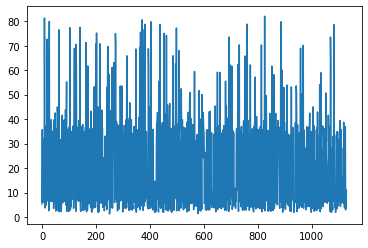

In [ ]:
plt.plot(ypred)

In [ ]:
from scipy.signal import wiener

In [ ]:
df_s1 = df2.loc[df2['StoreNumber']==1000]
df_s2 = df2.loc[df2['StoreNumber']==2000]
df_s3 = df2.loc[df2['StoreNumber']==3000]
df_s4 = df2.loc[df2['StoreNumber']==4000]

In [ ]:
in_s1 = np.array(df_s1['GrossSoldQuantity'])
wiener_s1 = wiener(in_s1[0:-1])

/usr/local/lib/python3.6/dist-packages/scipy/signal/signaltools.py:1456: RuntimeWarning: divide by zero encountered in true_divide
  res *= (1 - noise / lVar)
/usr/local/lib/python3.6/dist-packages/scipy/signal/signaltools.py:1456: RuntimeWarning: invalid value encountered in multiply
  res *= (1 - noise / lVar)


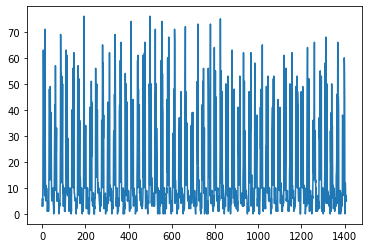

In [ ]:
# input to wiener filter
plt.plot(in_s1)

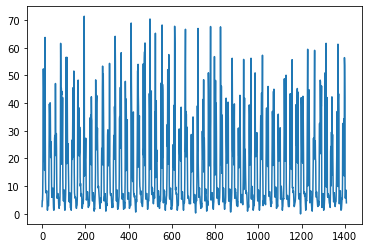

In [ ]:
# output of wiener filter
plt.plot(wiener_s1)

In [ ]:
print(in_s1[-1])
print(wiener_s1[-1])

5
4.0


In [ ]:
print(in_s1[1:21])

[ 3  5  6  3 13 31 63 47 10 27 48 35  7 49 71 25  7  5 11  7]


In [ ]:
print(wiener_s1[0:20])

[ 2.66666667  4.66666667  4.66666667  7.33333333 15.25873719 32.24089668
 52.34158387 45.38465141 18.94934066 27.62754244 36.66666667 33.05769182
 15.70074786 47.92474995 63.69750834 26.46112926 12.33333333  7.66666667
  7.66666667  8.        ]


In [ ]:
print(in_s1[-10:])

[57 44  5  0 12  8  6  5  7  5]


In [ ]:
print(wiener_s1[-11:])

[56.40844646 53.66666667 41.98183837  8.33037242  5.66666667  6.66666667
  8.66666667  6.33333333  6.          5.66666667  4.        ]


In [ ]:
print(mse(in_s1[1:], wiener_s1[0:-1], squared=False))

14.777012059213682
